# Business Understanding

We are analyzing from the point of view of a homeowner in King County, Washington looking to increase the value of their home through efficient rennovations. Our value is defined as the overall price of the home, and our variables are iterated over three models to see how some factors change the overall value. Not only will our modeling and analysis help our stakeholder understand King County specifically, but it well provide inferential understanding to help them decide which aspects of home rennovation can give them the best return on investment.

# Data Understanding

We gathered our data from the King County Sales from 2014 to 2015. 


Some of our limitations stemmed from the fact that our data was collected from the range of 2014-2015. This prevented us from seeing how a current homeowner could use our model while understanding the inflation rate as well as the change in value in the current time period. Another data limitation that we faced, was understanding how rennovation is defined consistently across homeowners, while costs of rennovation are difficult to incorporate, we

Load libraries and main dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/Master_Dataset.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,...,grade_int_11,grade_int_12,grade_int_13,grade_int_3,grade_int_4,grade_int_5,grade_int_6,grade_int_7,grade_int_8,grade_int_9
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,1180,...,0,0,0,0,0,0,0,1,0,0
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,2170,...,0,0,0,0,0,0,0,1,0,0
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,770,...,0,0,0,0,0,0,1,0,0,0
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,1050,...,0,0,0,0,0,0,0,1,0,0
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,1680,...,0,0,0,0,0,0,0,0,1,0


Create list of continuous variables

In [3]:
columns = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                'floors', 'sqft_above', 'yr_built']

Linearity and multicolinearity tests using pairplot and heatmap, respectively.

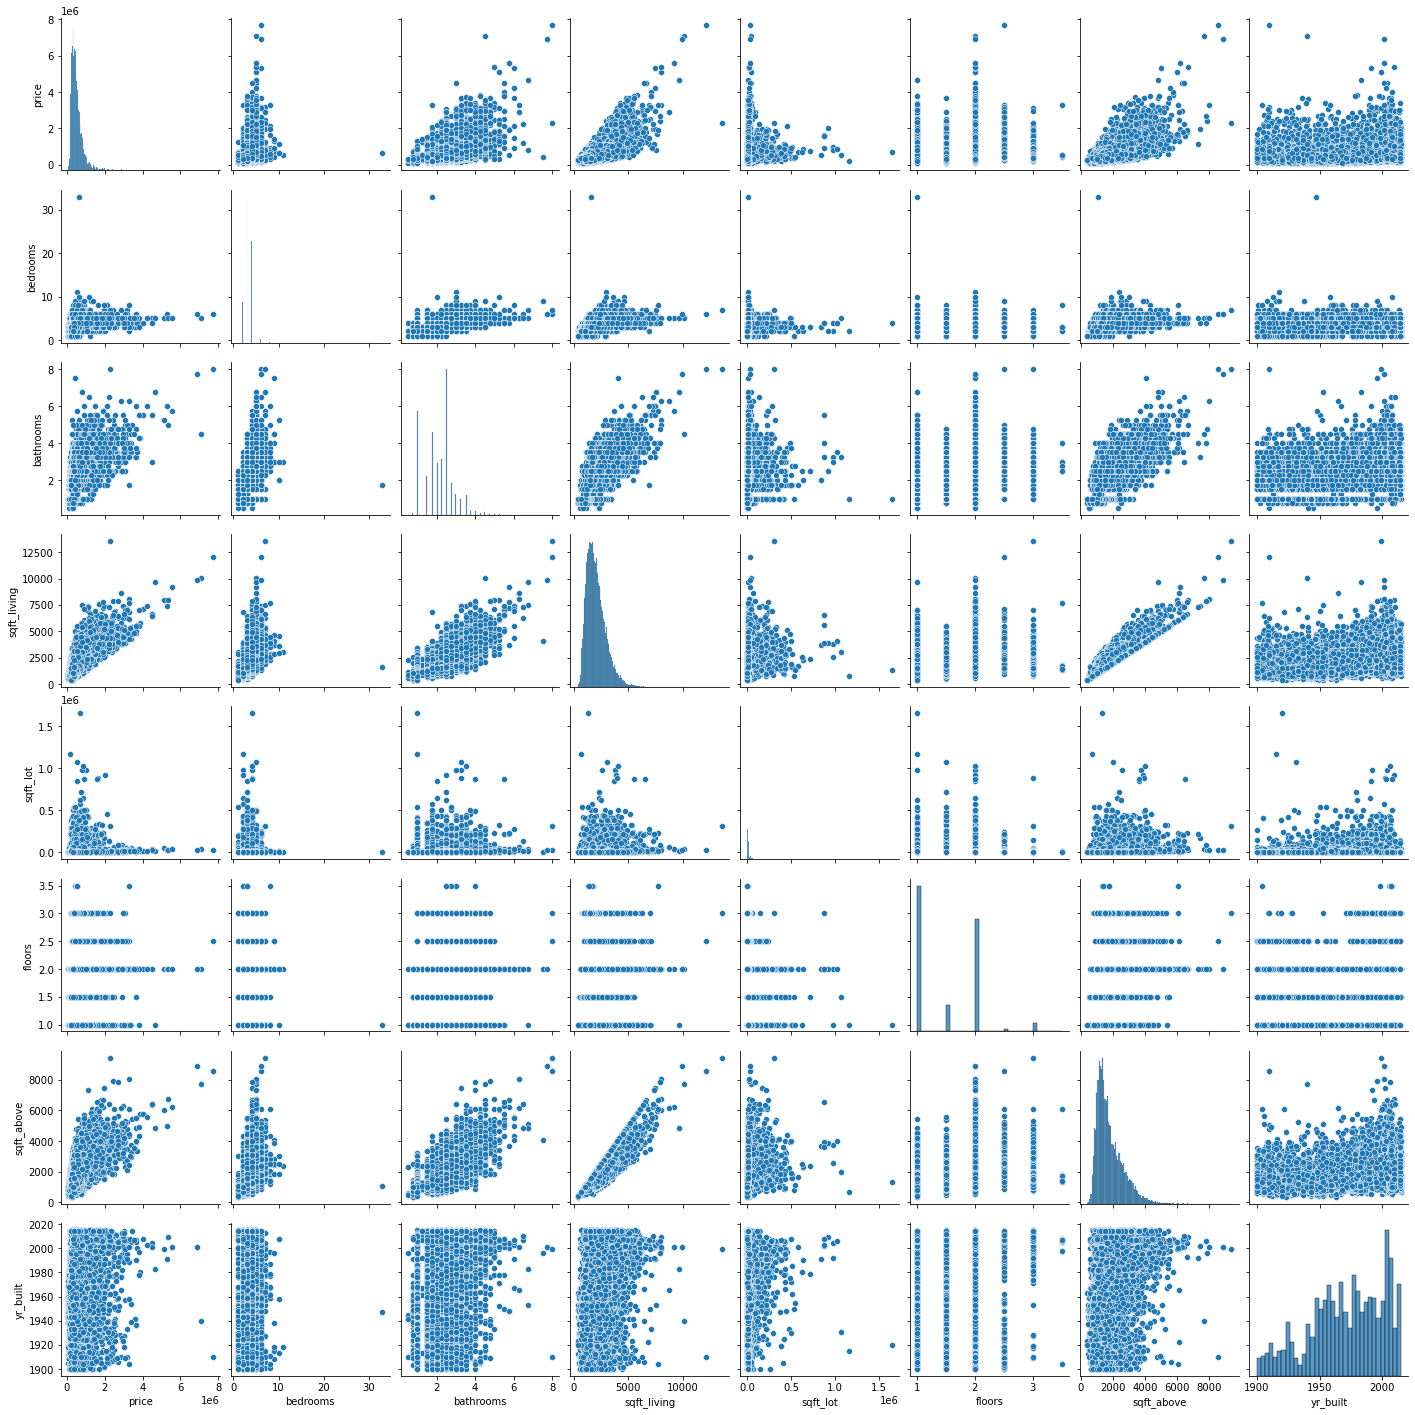

In [4]:
sns.pairplot(df[columns]);

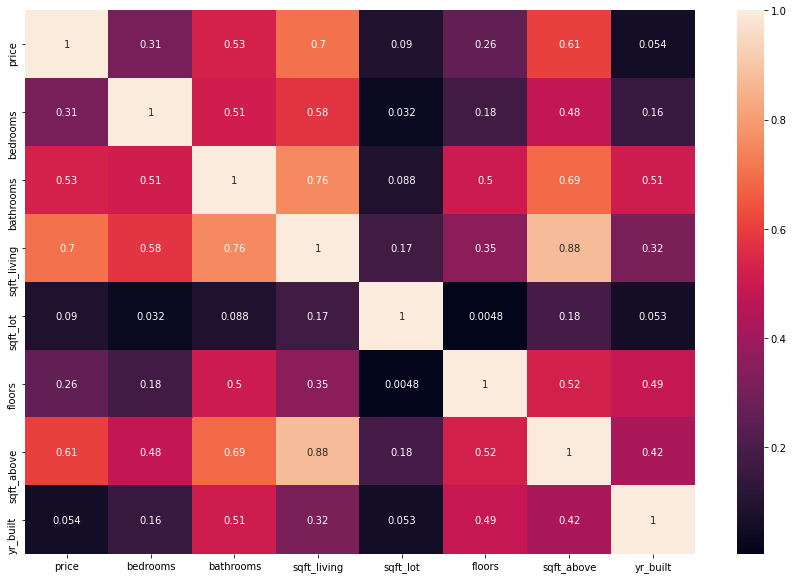

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(df[columns].corr().abs(), annot=True);

Linearity test passed. Highly multicolinear pairs with a correlation coefficient > 0.75 include (sqft_living and sqft_above) as well as (sqft_living and bathrooms). Will remove sqft_living as it is involved in both highly multicolinear pairs.

Train-test split, 75/25 

In [13]:
x_columns = ['bedrooms', 'bathrooms', 'sqft_lot', 
                'floors', 'sqft_above', 'yr_built']
X = df[x_columns]
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=10)

In [14]:
dummy_reg = DummyRegressor(strategy='mean')
dummy_reg.fit(X_train, y_train)
dummy_reg.predict(X_train)
dummy_reg.score(X_train, y_train)

0.0

In [15]:
display(X_train.head())
display(X_test.head())

,bedrooms,bathrooms,sqft_lot,floors,sqft_above,yr_built
5362,4,2.50,9750,2.0,2160,1983
12174,4,3.25,17820,1.0,2630,1975
10807,2,1.00,7228,1.0,1000,1947
12964,3,1.50,10956,1.0,1840,1970
3405,4,2.25,12007,1.0,1220,1979


,bedrooms,bathrooms,sqft_lot,floors,sqft_above,yr_built
19317,3,2.25,6600,2.0,1670,1990
13025,4,2.75,15000,1.0,1690,1976
9602,2,1.00,5395,1.0,860,1940
9727,3,1.00,21183,1.0,1030,1955
1088,4,2.00,11700,1.0,1850,1969


In [16]:
# Fit Scalar to Train
ss = StandardScaler()
ss.fit(X_train)

# Transform Train
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [17]:
#Instantiate LR object
lr = LinearRegression()
# fit the model on the training set
lr.fit(X_train, y_train)
# Check the R^2 of the training data
lr.score(X_train, y_train)

0.4806510519320769

In [18]:
lr.coef_

array([-3.86406977e+04,  1.89965302e+05, -2.53700144e-01, -3.67412749e+04,
        2.48667818e+02, -4.25793946e+03])

In [19]:
lr.score(X_test, y_test)

0.4811726163401695

In [20]:
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train), lr.score(X_test_scaled, y_test)

(0.4806510519320768, 0.4811726163401482)

It appears that our R-squared value for our first model is 0.48. This tells us that our x-variables (Bedrooms, Bathrooms, Sqft-Lot, Floors, SqFt-Above, and Yr-built) account for 48% of variability in our price or value of the house. We now have to conduct a recursive feature elimination to understand which variables are more significant to include in comparison to our other variables. This step is very important as it can help us understand which variables we should include as we make iterations to our model!

In [21]:
from sklearn.feature_selection import RFE

from sklearn.feature_selection import SelectFromModel

lr_rfe = LinearRegression() #instantiate the model 
select = RFE(lr_rfe, n_features_to_select=2) 
ss = StandardScaler() 
ss.fit(X)
lr_scaled = ss.transform(X) #dropping your target 
select.fit(X= X, y=y)

select.support_ #tells you which features you selected in boolean array 
select.ranking_ #match up which predictors have the best ranking according to head

array([1, 1, 5, 2, 4, 3])

In [22]:
X.head()

,bedrooms,bathrooms,sqft_lot,floors,sqft_above,yr_built
0,3,1.00,5650,1.0,1180,1955
1,3,2.25,7242,2.0,2170,1951
2,2,1.00,10000,1.0,770,1933
3,4,3.00,5000,1.0,1050,1965
4,3,2.00,8080,1.0,1680,1987


We can see that the square foot above the house is the lowest ranked variable after we conducted our recursive feature elimination. Let's drop it and see where that brings us.

In [23]:
x_columns = ['bedrooms', 'bathrooms', 'floors', 'yr_built', 'sqft_living', 'sqft_above']
X = df[x_columns]
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=10)

In [24]:
display(X_train.head())
display(X_test.head())

,bedrooms,bathrooms,floors,yr_built,sqft_living,sqft_above
5362,4,2.50,2.0,1983,2160,2160
12174,4,3.25,1.0,1975,3860,2630
10807,2,1.00,1.0,1947,1000,1000
12964,3,1.50,1.0,1970,1840,1840
3405,4,2.25,1.0,1979,2080,1220


,bedrooms,bathrooms,floors,yr_built,sqft_living,sqft_above
19317,3,2.25,2.0,1990,1670,1670
13025,4,2.75,1.0,1976,2630,1690
9602,2,1.00,1.0,1940,1160,860
9727,3,1.00,1.0,1955,1730,1030
1088,4,2.00,1.0,1969,1850,1850


In [25]:
# Fit Scalar to Train
ss = StandardScaler()
ss.fit(X_train)

# Transform Train
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [26]:
#Instantiate LR object
lr = LinearRegression()
# fit the model on the training set
lr.fit(X_train, y_train)
# Check the R^2 of the training data
lr.score(X_train, y_train)

0.5521720125019471

In [27]:
lr.coef_

array([-6.66364452e+04,  7.21877617e+04,  4.94634809e+04, -3.42038162e+03,
        2.89186623e+02,  1.31938637e+01])

In [28]:
lr.score(X_test, y_test)

0.5649358245674007

In [29]:
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train), lr.score(X_test_scaled, y_test)

(0.5521720125019471, 0.5649358245674003)

Here we can analyze our root mean squared error associated with our second model.

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)


y_hat_train = lr.predict(X_train_scaled)
y_hat_test = lr.predict(X_test_scaled)


train_rmse = (mean_squared_error(y_train, y_hat_train)**.5)
test_rmse = (mean_squared_error(y_test, y_hat_test)**.5)

print(train_rmse, test_rmse)

247647.1282073435 236863.33512781118
